In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve 
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import warnings 
warnings.filterwarnings('ignore')


In [26]:
df = pd.read_csv(r"C:\Users\Namrata Vasant Borse\Downloads\Sleep_health_and_lifestyle_dataset.csv")

In [27]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [29]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [76]:
df.shape

(374, 14)

In [30]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [31]:
# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numerical columns
        df[col].fillna(df[col].mean(), inplace=True)



In [32]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [33]:
label_encoders = {}
categorical_columns = ['Occupation','Gender', 'BMI Category', 'Sleep Disorder']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [34]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,126/83,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
3,4,1,28,6,5.9,4,30,8,2,140/90,85,3000,1
4,5,1,28,6,5.9,4,30,8,2,140/90,85,3000,1
5,6,1,28,9,5.9,4,30,8,2,140/90,85,3000,0
6,7,1,29,10,6.3,6,40,7,2,140/90,82,3500,0
7,8,1,29,1,7.8,7,75,6,0,120/80,70,8000,1
8,9,1,29,1,7.8,7,75,6,0,120/80,70,8000,1
9,10,1,29,1,7.8,7,75,6,0,120/80,70,8000,1


In [35]:
# Split 'Blood Pressure' into 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df.drop(columns=['Blood Pressure'], inplace=True)

In [36]:
print("Cleaned Data Overview:")
df.info()

Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int32  
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    int32  
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    int32  
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int32  
 12  Systolic                 374 non-null    float64
 13  Diastolic                374 non-null    float64
dtypes: 

In [37]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic', 'Diastolic'],
      dtype='object')

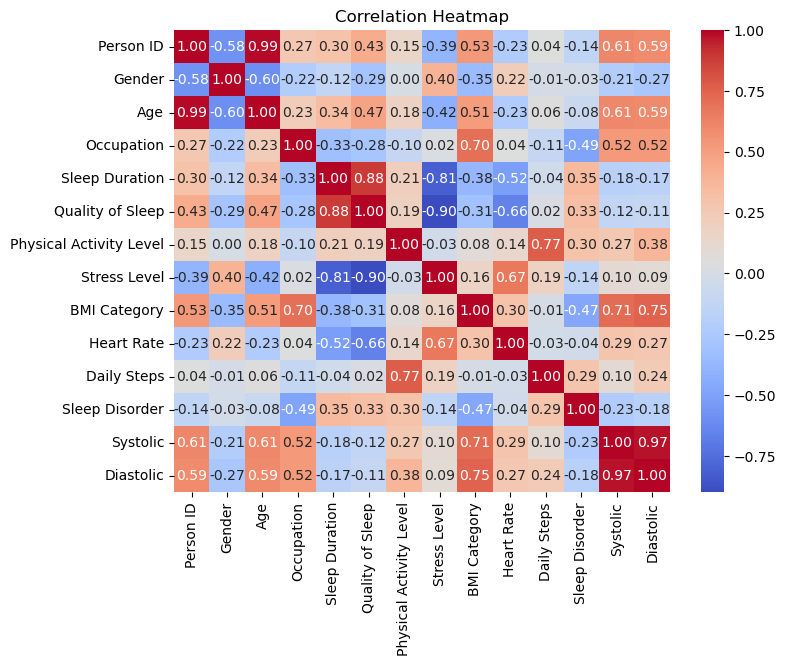

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


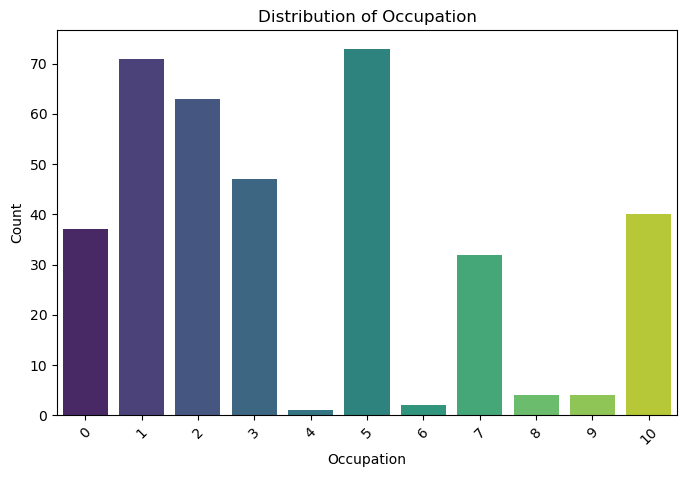

In [77]:
# 0 – Accountant , 1 – Doctor , 2 – Engineer , 3 – Lawyer , 4 – Manager ,5 – Nurse , 6 – Sales Representative ,
#7 – Sales Person , 8 – Scientist , 9 – Software Engineer , 10 – Teacher 

plt.figure(figsize=(8, 5))                       
sns.countplot(x=df['Occupation'], palette='viridis')
plt.title(f'Distribution of {'Occupation'}')
plt.xlabel('Occupation')
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.show()
  

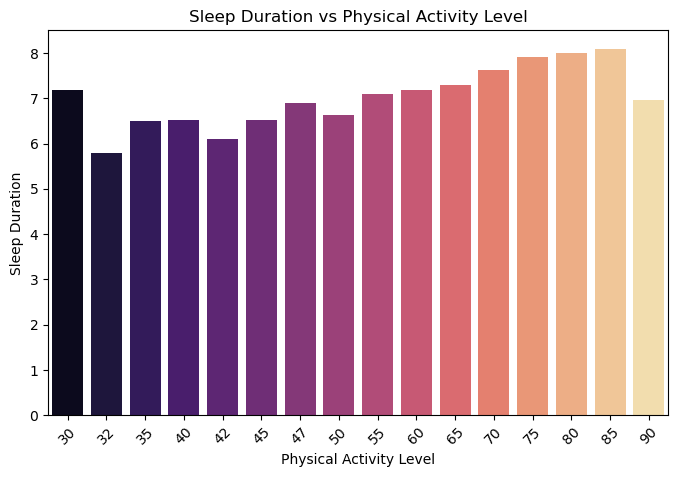

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df[ 'Physical Activity Level'], y=df['Sleep Duration'], ci=None, palette='magma')
plt.title(f'Sleep Duration vs {'Physical Activity Level'}')
plt.xlabel( 'Physical Activity Level')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45)
plt.show()

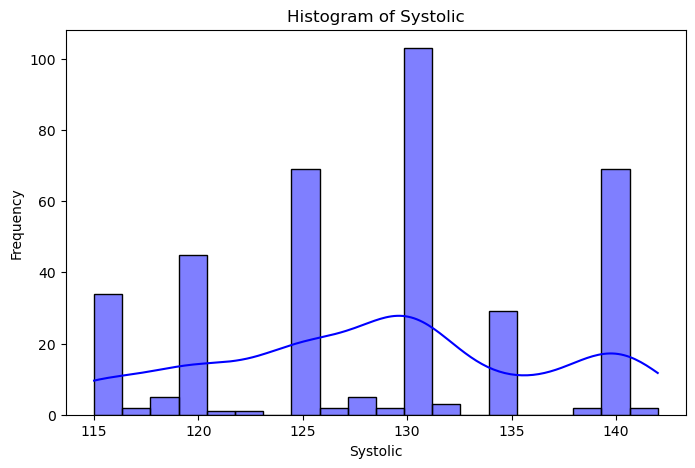

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df[('Systolic')], bins=20, kde=True, color='blue')
plt.title(f'Histogram of {'Systolic'}')
plt.xlabel('Systolic')
plt.ylabel('Frequency')
plt.show()

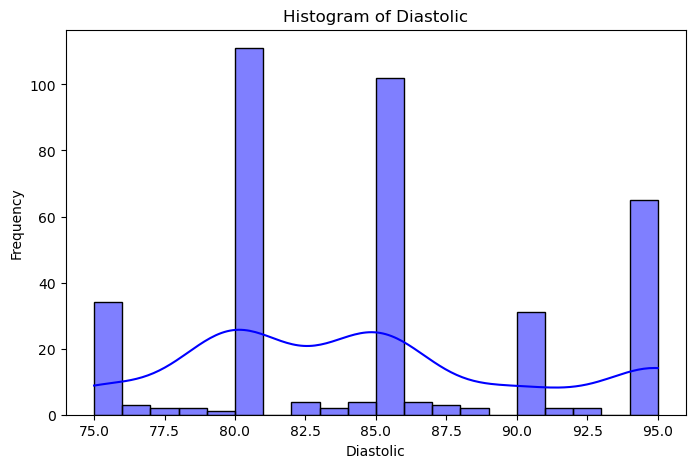

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(df[('Diastolic')], bins=20, kde=True, color='blue')
plt.title(f'Histogram of {'Diastolic'}')
plt.xlabel('Diastolic')
plt.ylabel('Frequency')
plt.show()


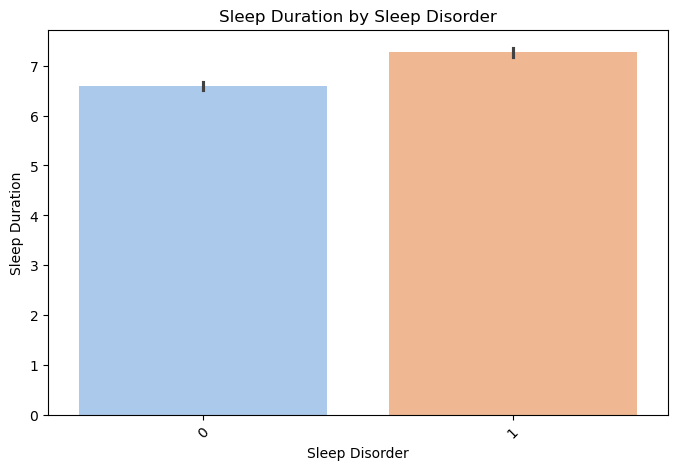

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Sleep Disorder'], y=df['Sleep Duration'], palette='pastel')
plt.title(f'Sleep Duration by {'Sleep Disorder'}')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45)
plt.show()

In [45]:
scaler = StandardScaler()
numerical_columns = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level",
                     "Stress Level", "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [46]:
x = df.drop(columns=['Sleep Disorder'],axis=1) 
y = df['Sleep Disorder'] 

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [48]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report

# Generate a classification report
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8933333333333333
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.92      0.93        59

    accuracy                           0.89        75
   macro avg       0.83      0.86      0.85        75
weighted avg       0.90      0.89      0.90        75



In [49]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Generate a classification report
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.96      0.93      0.95        59

    accuracy                           0.92        75
   macro avg       0.87      0.90      0.89        75
weighted avg       0.92      0.92      0.92        75



In [50]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
print("RandomForestClassifier:", accuracy_score(y_test, y_pred_rf))

# Generate a classification report
print(classification_report(y_test, y_pred_rf))

RandomForestClassifier: 0.9066666666666666
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.93      0.94        59

    accuracy                           0.91        75
   macro avg       0.86      0.87      0.86        75
weighted avg       0.91      0.91      0.91        75



In [51]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)
print("Gradientboost Accuracy:", accuracy_score(y_test, y_pred_gb))

# Generate a classification report
print(classification_report(y_test, y_pred_gb))

Gradientboost Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.96      0.93      0.95        59

    accuracy                           0.92        75
   macro avg       0.87      0.90      0.89        75
weighted avg       0.92      0.92      0.92        75



In [52]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Generate a classification report
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.95      0.95      0.95        59

    accuracy                           0.92        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.92      0.92      0.92        75



In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Generate a classification report
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.95      0.97      0.96        59

    accuracy                           0.93        75
   macro avg       0.91      0.89      0.90        75
weighted avg       0.93      0.93      0.93        75



In [54]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Generate a classification report
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.97      0.95      0.96        59

    accuracy                           0.93        75
   macro avg       0.89      0.91      0.90        75
weighted avg       0.94      0.93      0.93        75



In [55]:
model_acc = {
    "Logistic Regression Accuracy :" : accuracy_score(y_test, y_pred),
    "Decision Tree Accuracy :" : accuracy_score(y_test, y_pred_dt),
    "RandomForestClassifier Accuracy :" : accuracy_score(y_test, y_pred_rf),
    "Gradientboost Accuracy :" : accuracy_score(y_test, y_pred_gb),
    "XGBoost Accuracy :" : accuracy_score(y_test, y_pred_xgb),
    "KNN Accuracy :" : accuracy_score(y_test, y_pred_knn),
    "SVM Accuracy :" : accuracy_score(y_test, y_pred_svm)
}

best_model = max(model_acc, key=model_acc.get)
best_accuracy = model_acc[best_model]

# Extract model names and accuracies
models = list(model_acc.keys())
accuracies = list(model_acc.values())

print("Best Model : ", best_model)
print("Best Model Accuracy : ", best_accuracy)

Best Model :  KNN Accuracy :
Best Model Accuracy :  0.9333333333333333


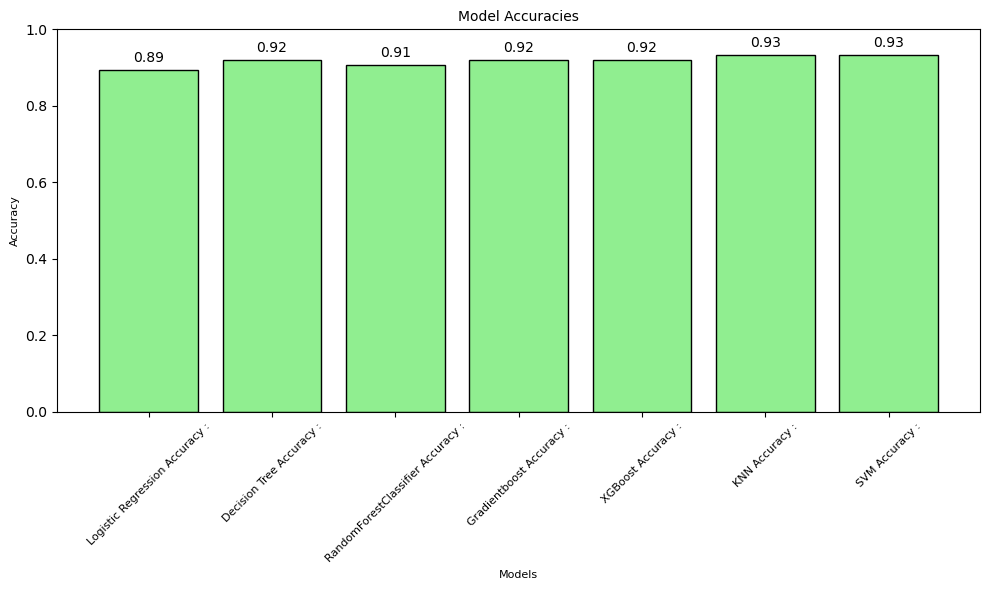

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='lightgreen', edgecolor='black')
plt.xlabel('Models', fontsize=8)
plt.ylabel('Accuracy', fontsize=8)
plt.title('Model Accuracies', fontsize=10)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45, fontsize=8)
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the best model's accuracy on the graph
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [75]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

# Perform 5-fold cross-validation
cv_results = cross_validate(xgb_model, x_train, y_train, cv=5, scoring=['accuracy', 'f1_macro', 'roc_auc'], return_train_score=False)

# Print detailed cross-validation results
print("Cross-validation Accuracy Scores:", cv_results['test_accuracy'])
print("Cross-validation F1 Scores:", cv_results['test_f1_macro'])
print("Cross-validation ROC AUC Scores:", cv_results['test_roc_auc'])

# Print the average scores for each metric
print("Average Cross-validation Accuracy:", cv_results['test_accuracy'].mean())
print("Average Cross-validation F1 Score:", cv_results['test_f1_macro'].mean())
print("Average Cross-validation ROC AUC Score:", cv_results['test_roc_auc'].mean())


Cross-validation Accuracy Scores: [0.95       0.88333333 0.98333333 0.96666667 0.98305085]
Cross-validation F1 Scores: [0.91931869 0.81174361 0.97473684 0.94791667 0.97299771]
Cross-validation ROC AUC Scores: [0.95662848 0.80555556 0.98350694 0.96354167 0.93617021]
Average Cross-validation Accuracy: 0.953276836158192
Average Cross-validation F1 Score: 0.9253427048684013
Average Cross-validation ROC AUC Score: 0.9290805714675396
